In [1]:
import os
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from windrose import WindroseAxes, plot_windrose

In [3]:
input_path = '/mnt/c/Users/Sreenath/Documents/NOAA/SPLASH/Tower_Data/Kettle_Ponds'
os.chdir(input_path)


In [32]:
#read in the data files
#reading in the 1 minute met data, that I converted to a csv file for ease of reading in
kp_met_df = pd.read_csv("KP22_001-365-MET.csv")
kp_met_df.head

/tmp/ipykernel_777/4109922002.py:3: DtypeWarning: Columns (3,4,11,30,46) have mixed types. Specify dtype option on import or set low_memory=False.
  kp_met_df = pd.read_csv("KP22_001-365-MET.csv")


<bound method NDFrame.head of           date time(MST)   DecDay  wsp_3m wsp_5m wsp_10m  dir_3m  dir_5m  \
0          1/1/2022 0:01    1.001   2.569  2.788   3.143   328.2   325.4   
1          1/1/2022 0:02    1.001   2.450   2.77   3.141   319.2   313.4   
2          1/1/2022 0:03    1.002   1.942  2.465    2.71   316.1   311.6   
3          1/1/2022 0:04    1.003   2.205  2.432   2.586   318.0   314.0   
4          1/1/2022 0:05    1.003   2.377  2.481   2.697   317.2   317.7   
...                  ...      ...     ...    ...     ...     ...     ...   
525231  12/31/2022 23:56  365.997   3.433  3.796   4.462   140.0   151.8   
525232  12/31/2022 23:57  365.998   3.441  3.654   4.224   139.7   154.2   
525233  12/31/2022 23:58  365.999   3.276  3.518   3.835   143.4   155.9   
525234  12/31/2022 23:59  365.999   2.680  2.917   3.419   146.4   157.3   
525235     1/1/2023 0:00    1.000   3.175  3.236   3.727   143.6   157.2   

        dir_10m  stheta_3m  stheta_5m  ...  SoilT2b_Avg S

In [33]:
kp_met_df.columns

Index(['date time(MST)', 'DecDay', 'wsp_3m', 'wsp_5m', 'wsp_10m', 'dir_3m',
       'dir_5m', 'dir_10m', 'stheta_3m', 'stheta_5m', 'stheta_10m',
       'Pressure_Avg', 'RH_Avg', 'Tair1_3m', 'Tair2_3m', 'Tair1_5m',
       'Tair2_5m', 'Tair1_10m', 'Tair2_10m', 'SurfT1', 'SurfT2', 'SurfT3',
       'Rg_in_avg', 'Rg_out_avg', 'Lw_in_avg', 'Lw_out_avg', 'ghflx_a',
       'ghflx_b', 'ghflx_c', 'Kt_a', 'Kt_b', 'Kt_c', 'SoilT2a_Avg',
       'SoilT5a_Avg', 'SoilT10a_Avg', 'SoilT20a_Avg', 'SoilT50a_Avg',
       'SoilT2b_Avg', 'SoilT5b_Avg', 'SoilT10b_Avg', 'SoilT20b_Avg',
       'SoilT50b_Avg', 'SoilT2c_Avg', 'SoilT5c_Avg', 'SoilT10c_Avg',
       'SoilT20c_Avg', 'SoilT50c_Avg'],
      dtype='object')

In [34]:
kp_met_df

,date time(MST),DecDay,wsp_3m,wsp_5m,wsp_10m,dir_3m,dir_5m,dir_10m,stheta_3m,stheta_5m,...,SoilT2b_Avg,SoilT5b_Avg,SoilT10b_Avg,SoilT20b_Avg,SoilT50b_Avg,SoilT2c_Avg,SoilT5c_Avg,SoilT10c_Avg,SoilT20c_Avg,SoilT50c_Avg
0,1/1/2022 0:01,1.001,2.569,2.788,3.143,328.2,325.4,317.0,5.4,5.6,...,-0.27,-0.19,-0.03,0.52,1.96,-0.30,-0.23,-0.16,0.13,1.91
1,1/1/2022 0:02,1.001,2.450,2.77,3.141,319.2,313.4,304.3,3.9,3.9,...,-0.27,-0.19,-0.03,0.52,1.96,-0.30,-0.23,-0.16,0.13,1.91
2,1/1/2022 0:03,1.002,1.942,2.465,2.71,316.1,311.6,302.4,3.2,2.4,...,-0.27,-0.19,-0.03,0.52,1.96,-0.30,-0.23,-0.16,0.13,1.91
3,1/1/2022 0:04,1.003,2.205,2.432,2.586,318.0,314.0,306.3,1.9,1.8,...,-0.28,-0.19,-0.03,0.52,1.95,-0.30,-0.23,-0.16,0.13,1.91
4,1/1/2022 0:05,1.003,2.377,2.481,2.697,317.2,317.7,314.0,1.6,1.5,...,-0.27,-0.19,-0.03,0.52,1.96,-0.30,-0.23,-0.16,0.13,1.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525231,12/31/2022 23:56,365.997,3.433,3.796,4.462,140.0,151.8,144.8,3.9,3.4,...,-1.11,-1.10,-0.93,-0.56,0.89,-0.96,-0.90,-0.78,-0.43,1.27
525232,12/31/2022 23:57,365.998,3.441,3.654,4.224,139.7,154.2,145.1,1.2,3.7,...,-1.11,-1.10,-0.93,-0.56,0.89,-0.96,-0.90,-0.78,-0.43,1.27
525233,12/31/2022 23:58,365.999,3.276,3.518,3.835,143.4,155.9,146.7,3.4,1.4,...,-1.11,-1.10,-0.93,-0.56,0.89,-0.96,-0.90,-0.78,-0.43,1.27
525234,12/31/2022 23:59,365.999,2.680,2.917,3.419,146.4,157.3,152.6,6.1,6.3,...,-1.11,-1.10,-0.93,-0.56,0.89,-0.96,-0.90,-0.78,-0.43,1.27


In [38]:
#windrose for the whole year
#qc the data
kp_met_df["dir_10m_num"] = pd.to_numeric(kp_met_df.dir_10m, errors='coerce')
kp_met_df["wsp_10m_num"] = pd.to_numeric(kp_met_df.wsp_10m, errors='coerce')



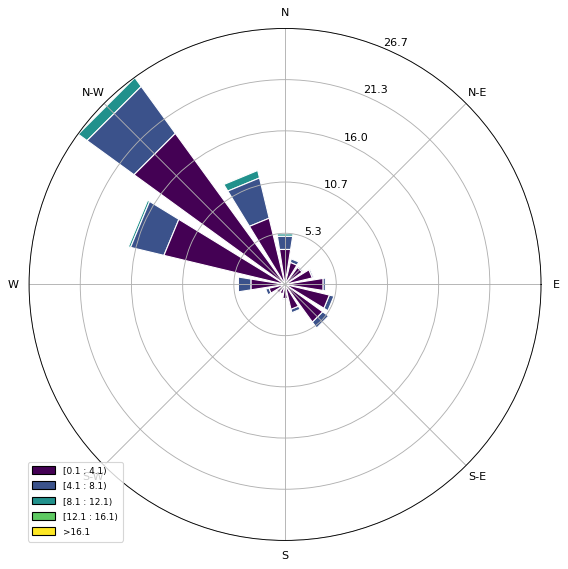

In [64]:
wd_qc_f =  kp_met_df.dir_10m_num > 0

ws = np.asarray(kp_met_df.loc[wd_qc_f]['wsp_10m_num'])
wd = np.asarray(kp_met_df.loc[wd_qc_f]['dir_10m_num'])

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, bins=np.arange(0.1,20,4),edgecolor="white")
ax.set_legend()

plt.savefig("Plots/2022_wind.png",dpi=300)


<Axes: >

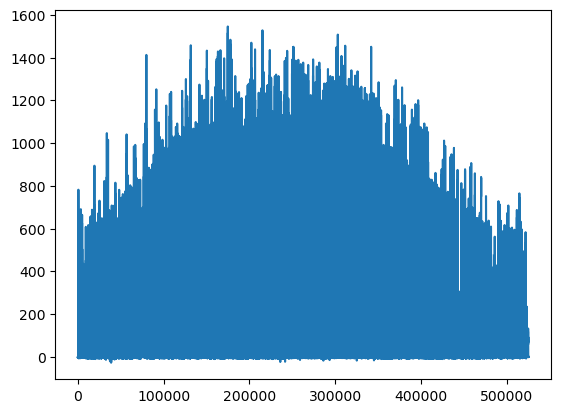

In [41]:
#copying dataframe with the wind direction qc
df_wind_qc = kp_met_df.loc[wd_qc_f].copy()
#check incoming radiation data
df_wind_qc.Rg_in_avg.plot()

In [55]:
df_wind_qc["date time(MST)"] = pd.to_datetime(df_wind_qc["date time(MST)"],format='%m/%d/%Y %H:%M')

#day_filter
day_f1 = df_wind_qc.Rg_in_avg >= 25
night_f1 = df_wind_qc.Rg_in_avg < 25

#add in a day flag
df_wind_qc["day"] = -999
df_wind_qc.loc[day_f,"day"] = 1
df_wind_qc.loc[night_f,"day"] = 0

#now, subset for day and make plots
# and subset for night and make plots

day_f2 = df_wind_qc["day"] == 1
night_f2 = df_wind_qc["day"] == 0

wind_data_day = pd.DataFrame(
    {
        "ws": df_wind_qc.loc[day_f2]['wsp_10m_num'],
        "wd": df_wind_qc.loc[day_f2]['dir_10m_num'],
        "month": df_wind_qc.loc[day_f2]["date time(MST)"].dt.month,
    }
)

wind_data_night = pd.DataFrame(
    {
        "ws": df_wind_qc.loc[night_f2]['wsp_10m_num'],
        "wd": df_wind_qc.loc[night_f2]['dir_10m_num'],
        "month": df_wind_qc.loc[night_f2]["date time(MST)"].dt.month,
    }
)



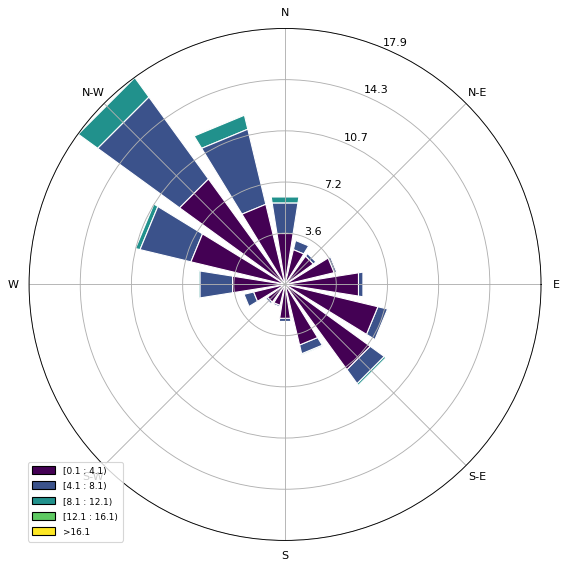

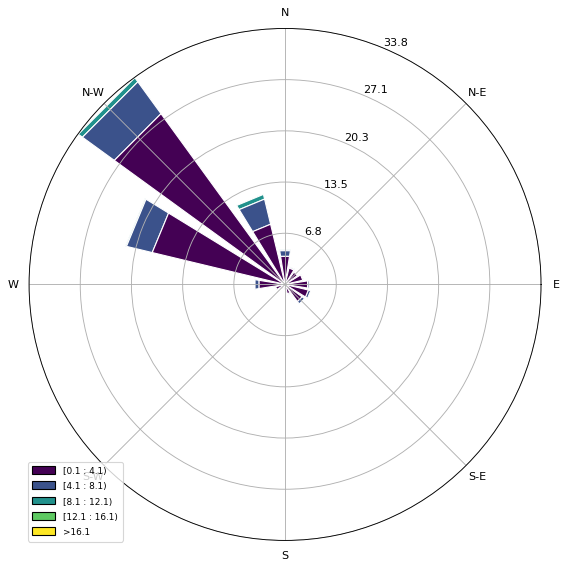

In [65]:
#daytime

ws = np.asarray(wind_data_day['ws'])
wd = np.asarray(wind_data_day['wd'])


ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, bins=np.arange(0.1,20,4),  edgecolor="white")
ax.set_legend()

plt.savefig("Plots/2022_wind_day.png",dpi=300)

#nighttime

ws = np.asarray(wind_data_night['ws'])
wd = np.asarray(wind_data_night['wd'])


ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, bins=np.arange(0.1,20,4),  edgecolor="white")
ax.set_legend()

plt.savefig("Plots/2022_wind_night.png",dpi=300)


In [59]:
def plot_windrose_subplots(data, *, direction, var, color=None, **kwargs):
    """wrapper function to create subplots per axis"""
    ax = plt.gca()
    ax = WindroseAxes.from_ax(ax=ax)
    plot_windrose(direction_or_df=data[direction], var=data[var], ax=ax, **kwargs)

def monthly_wind_rose(wind_data,save_fig=True):

    # this creates the raw subplot structure with a subplot per value in month.
    g = sns.FacetGrid(
        data=wind_data,
        # the column name for each level a subplot should be created
        col="month",
        # place a maximum of 3 plots per row
        col_wrap=3,
        subplot_kws={"projection": "windrose"},
        sharex=False,
        sharey=False,
        despine=False,
        height=3.5,
    )

    g.map_dataframe(
        plot_windrose_subplots,
        direction="wd",
        var="ws",
        normed=True,
        # manually set bins, so they match for each subplot
        bins=(0.1, 4, 8, 12, 16, 20),
        calm_limit=0.1,
        kind="bar",
    )

    # make the subplots easier to compare, by having the same y-axis range
    y_ticks = range(0, 17, 4)
    for ax in g.axes:
        ax.set_legend(
            title="$m \cdot s^{-1}$", bbox_to_anchor=(1.15, -0.1), loc="lower right"
        )
        ax.set_rgrids(y_ticks, y_ticks)

    # adjust the spacing between the subplots to have sufficient space between plots
    plt.subplots_adjust(wspace=-0.2)
    if save_fig : plt.savefig("Monthly_roses.png",dpi=300)


In [61]:
pwd()

'/mnt/c/Users/Sreenath/Documents/NOAA/SPLASH/Tower_Data/Kettle_Ponds'

/home/sreenath/miniconda3/envs/analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


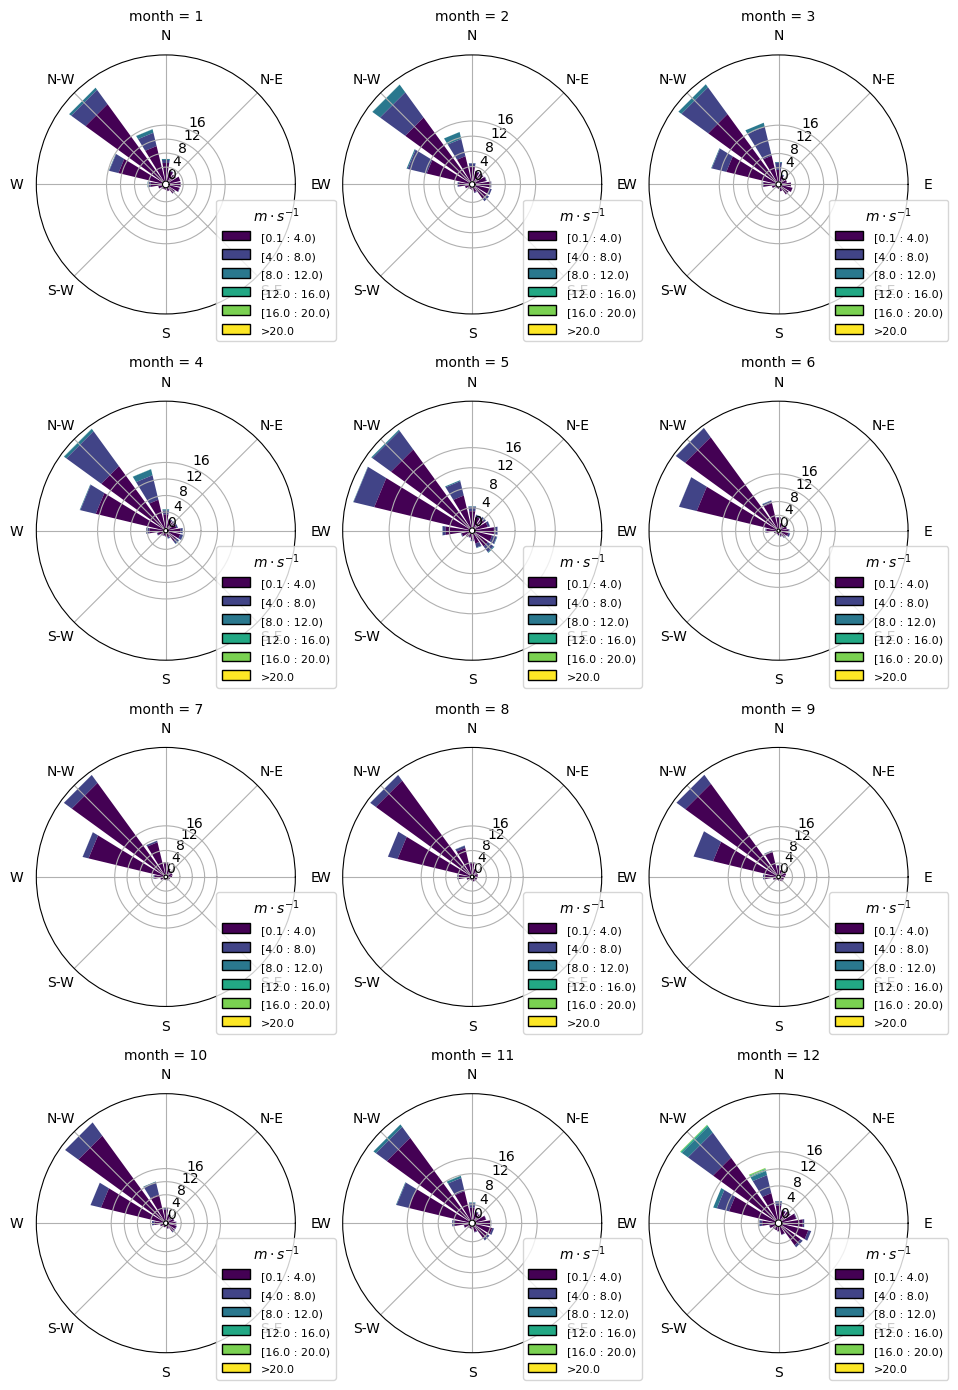

In [63]:
# daytime roses
#monthly_wind_rose(wind_data_day,True)
# nighttime roses
monthly_wind_rose(wind_data_night,True)